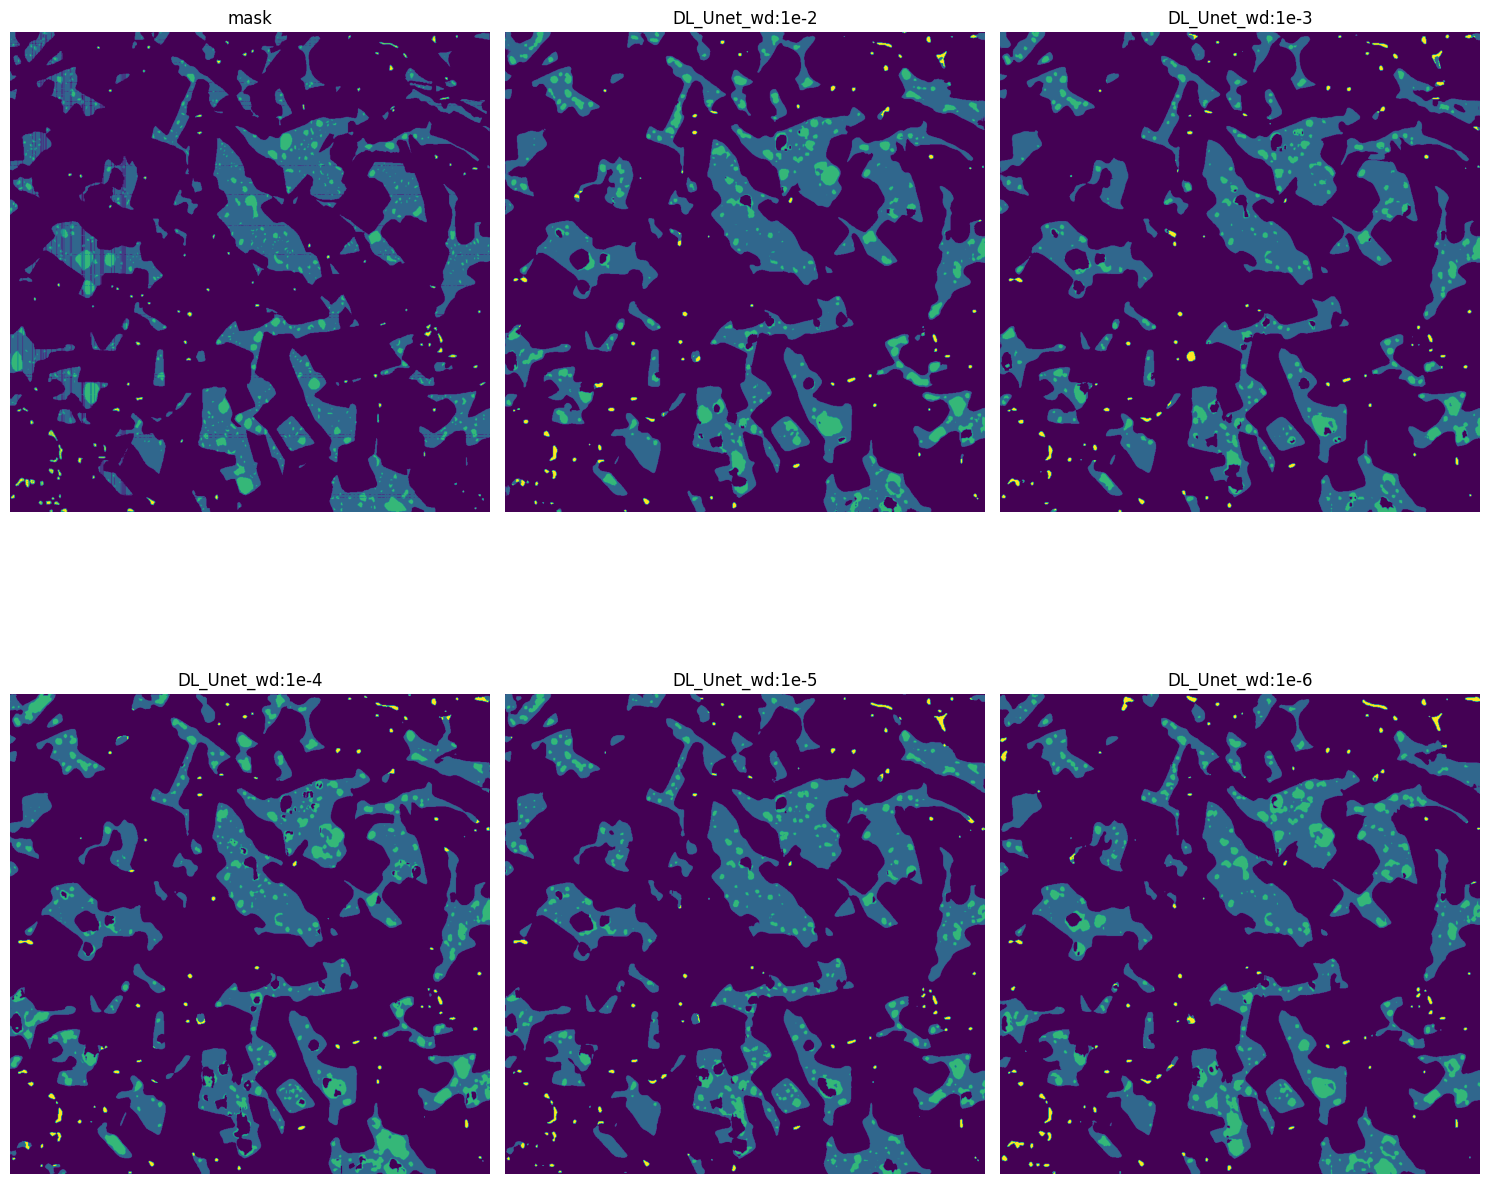

In [12]:
import torch
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

path1 = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/mask_resize.png'
path2 = '/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-2.png'
path3 = '/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-3.png'
path4 = '/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-4.png'
path5 = '/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-5.png'
path6 = '/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-6.png'

img1 = Image.open(path1)
img1 = np.array(img1)

img2 = Image.open(path2)
img2 = np.array(img2)

img3 = Image.open(path3)
img3 = np.array(img3)

img4 = Image.open(path4)
img4 = np.array(img4)

img5 = Image.open(path5)
img5 = np.array(img5)

img6 = Image.open(path6)
img6 = np.array(img6)

plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.title('mask')
plt.axis('off')
plt.imshow(img1)


plt.subplot(2,3,2)
plt.title('DL_Unet_wd:1e-2')
plt.axis('off')
plt.imshow(img2)


plt.subplot(2,3,3)
plt.title('DL_Unet_wd:1e-3')
plt.axis('off')
plt.imshow(img3)


plt.subplot(2,3,4)
plt.title('DL_Unet_wd:1e-4')
plt.axis('off')
plt.imshow(img4)

plt.subplot(2,3,5)
plt.title('DL_Unet_wd:1e-5')
plt.axis('off')
plt.imshow(img5)


plt.subplot(2,3,6)
plt.title('DL_Unet_wd:1e-6')
plt.axis('off')
plt.imshow(img6)

# # 调整子图之间的间距
# plt.subplots_adjust(wspace=0.3, hspace=0.1)
# 使用tight_layout自动调整子图参数
plt.tight_layout()
plt.show()


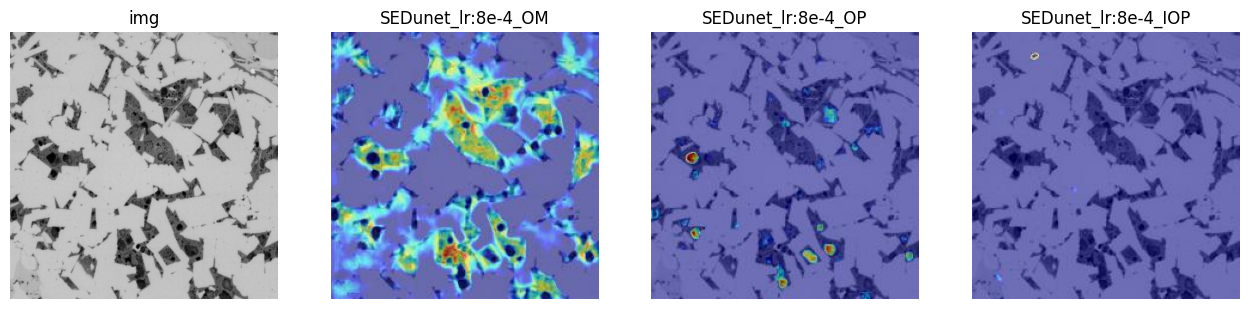

In [34]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

path_1 = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/SED_Unet_Dice_Cos_lr:8e-4_wd_1e-6_OM.jpg'
path_2 = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/SED_Unet_Dice_Cos_lr:8e-4_wd_1e-6_OP.jpg'
path_3 = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/SED_Unet_Dice_Cos_lr:8e-4_wd_1e-6_IOP.jpg'
path_4 = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/img_resize.png'
path_5 = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/predict/FC_rcp_adamw_predict.png'

img1 = Image.open(path_1)
img1 = np.array(img1)

img2 = Image.open(path_2)
img2 = np.array(img2)

img3 = Image.open(path_3)
img3 = np.array(img3)

img4 = Image.open(path_4).convert('RGB')
img4 = np.array(img4)

img5 = Image.open(path_5)
img5 = np.array(img5)

plt.figure(figsize=(20,20))
plt.subplot(1,5,2)
plt.title('SEDunet_lr:8e-4_OM')
plt.axis('off')
plt.imshow(img1)

plt.subplot(1,5,3)
plt.title('SEDunet_lr:8e-4_OP')
plt.axis('off')
plt.imshow(img2)

plt.subplot(1,5,4)
plt.title('SEDunet_lr:8e-4_IOP')
plt.axis('off')
plt.imshow(img3)

plt.subplot(1,5,1)
plt.title('img')
plt.axis('off')
plt.imshow(img4)

# plt.subplot(1,5,5)
# plt.title('AdamW_predict')
# plt.axis('off')
# plt.imshow(img5)

### 预测可视化

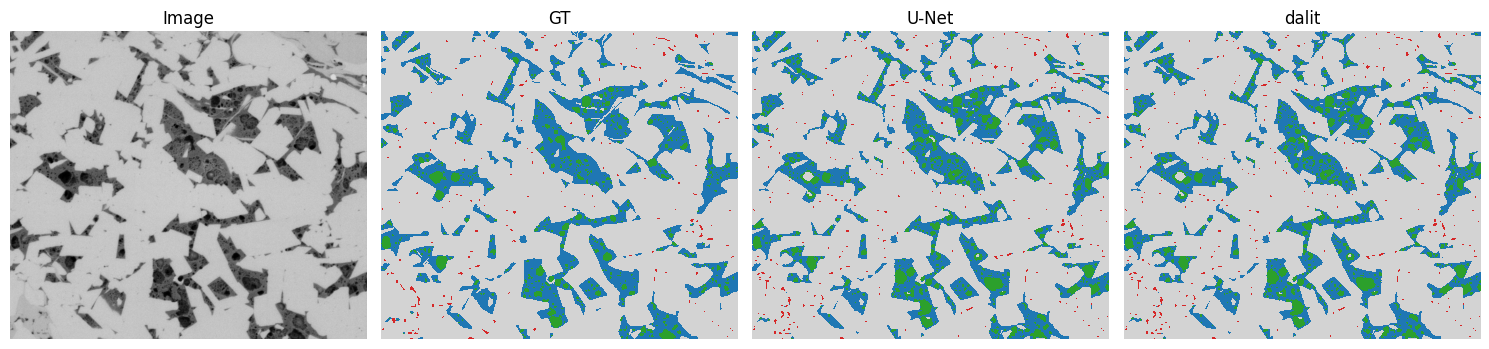

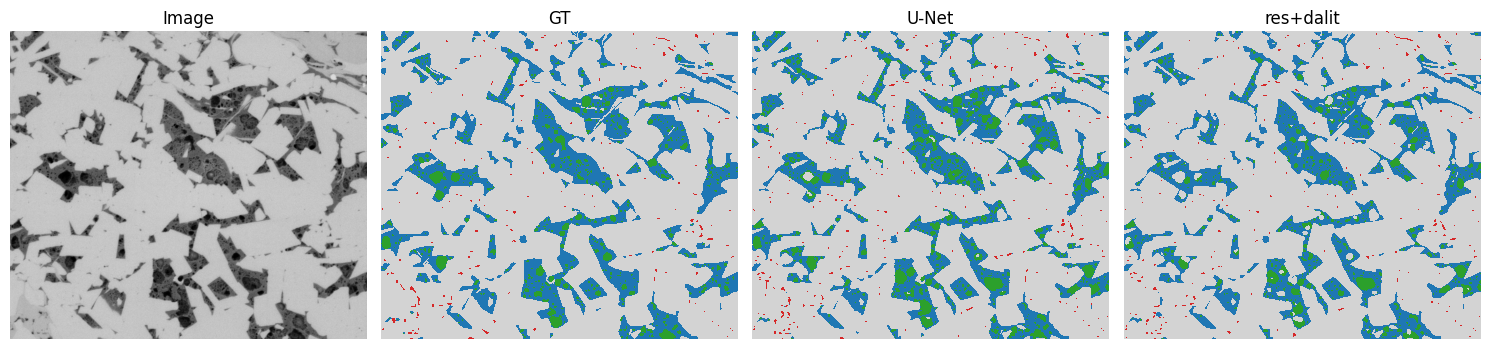

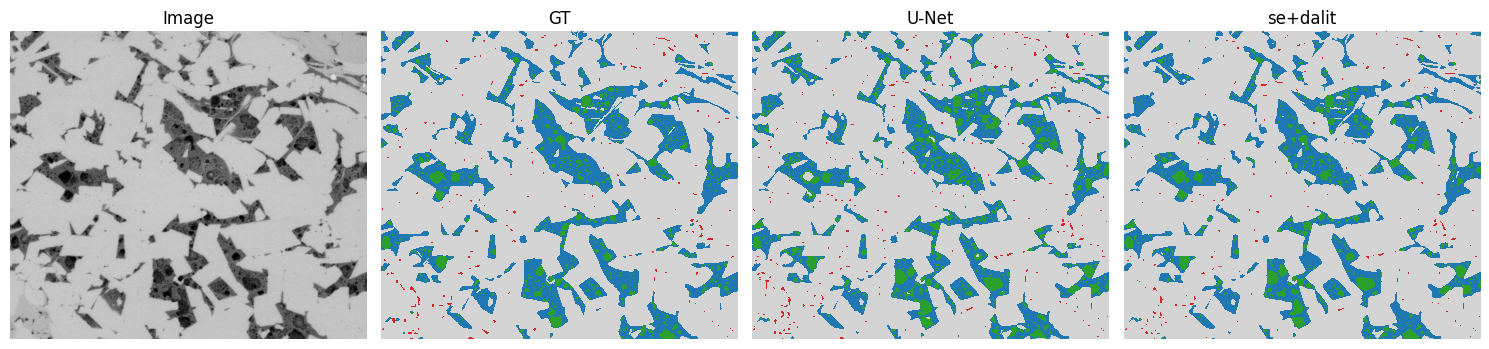

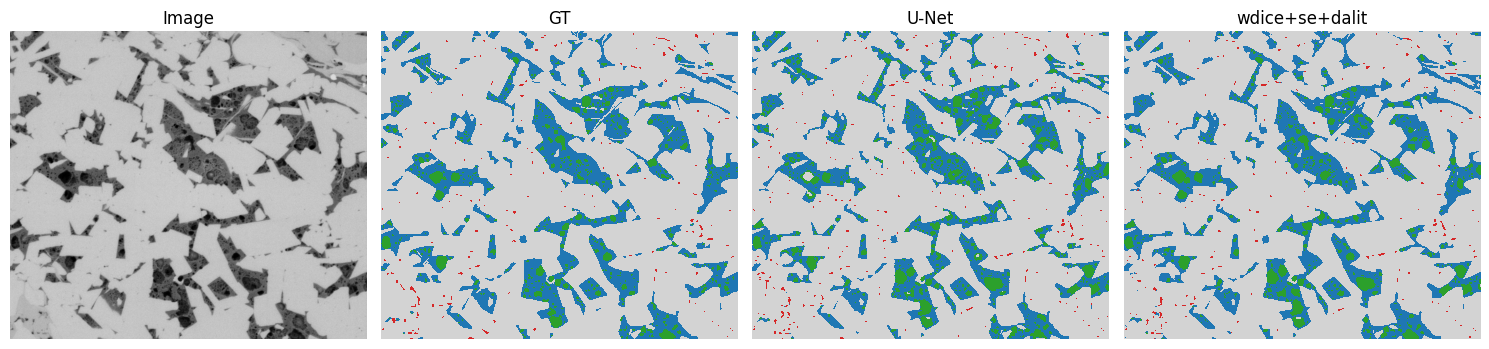

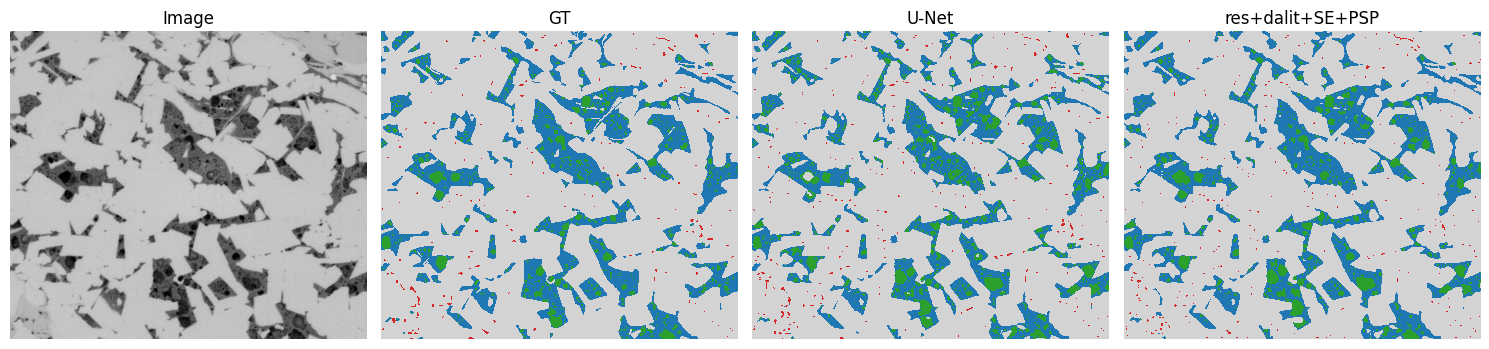

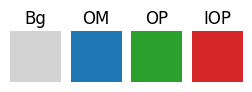

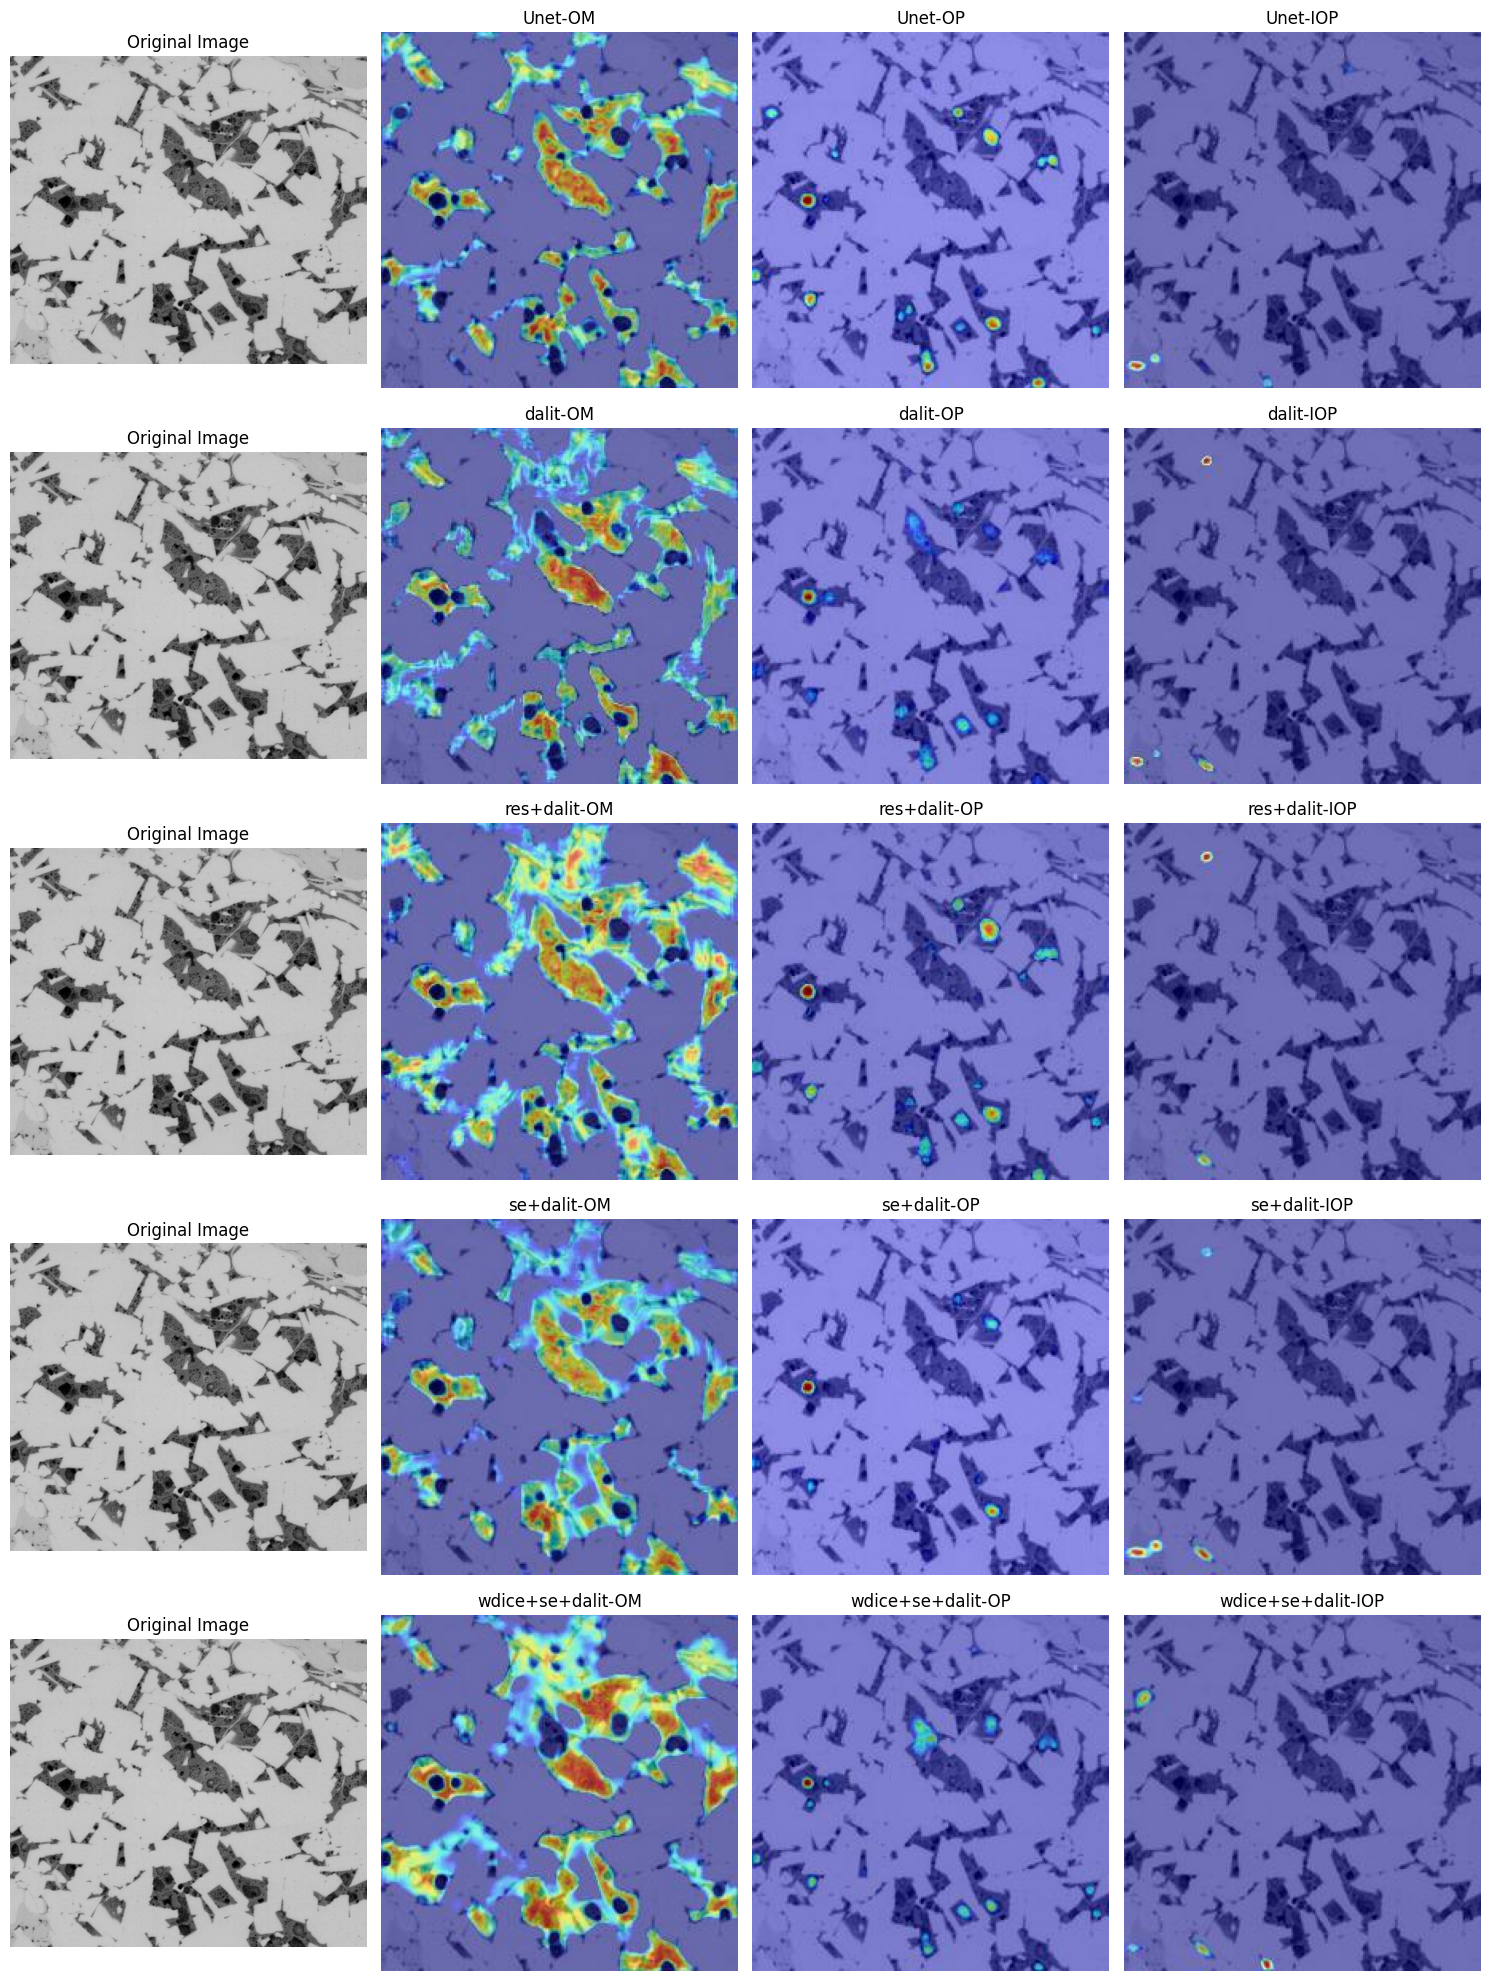

In [8]:
import cv2
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import numpy as np

# 定义自定义颜色列表
colors = ['#D3D3D3', '#1f77b4', '#2ca02c', '#d62728']
custom_cmap = ListedColormap(colors)

"""------------------------------------------------------预测可视化-------------------------------------------------------"""
pred_dict = {
    "Unet"            : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/single_predict/unet_Dice_cos_adamw_lr:8e-4_wd:1e-6_p:0.5.png",
    "dalit"           : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/single_predict/DL_unet_Dice_cos_adamw_lr:8e-4_wd:1e-6_p:0.5.png" ,
    "res+dalit"       : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/single_predict/ResD_unet_WDice_cos_adamw_lr:8e-4_wd:1e-6_p:0.5.png" ,
    "se+dalit"        : "/mnt/c/VScode/WS-Hub/WS-U2net/predict/psp_SED_unet_Dice_cos_adamw_lr:8e-4_wd:1e-6_p:0.5.png" ,
    "wdice+se+dalit"  : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/single_predict/psp_SED_unet_WDice_cos_adamw_lr:8e-4_wd:1e-6_p:0.5.png",
    "res+dalit+SE+PSP": "/mnt/c/VScode/WS-Hub/WS-U2net/single_predict/SE_Unet_XiuGai.png"
}
# 映射
names = list(pred_dict.keys())
paths = list(pred_dict.values())
num = len(pred_dict) - 1
for i in range(num):
    # img
    img = cv2.imread('/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1 - 003.jpeg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Image")
    # mask
    mask = cv2.imread('/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1 - 003.png')
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 4, 2)
    plt.imshow(mask, cmap=custom_cmap, interpolation='nearest')
    plt.axis('off')
    plt.title("GT")
    # U-Net
    p_img = cv2.imread(paths[1])
    p_img = cv2.cvtColor(p_img, cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 4, 3)
    plt.imshow(p_img, cmap=custom_cmap, interpolation='nearest')
    plt.axis('off')
    plt.title("U-Net")
    # 改进
    pred_img = cv2.imread(paths[i+1])
    pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 4, 4)
    plt.imshow(pred_img, cmap=custom_cmap, interpolation='nearest')
    plt.axis('off')
    plt.title(names[i+1])
    plt.tight_layout()
    plt.show()

# 类别颜色可视化
class_list = ['Bg', 'OM', 'OP', 'IOP']
plt.figure(figsize=(3, 1))
for i in range(len(class_list)):
    plt.subplot(1, len(class_list), i+1)
    # 显示不同数据的图像
    plt.imshow(np.full((2, 2), i), cmap=custom_cmap, vmin=0, vmax=len(class_list)-1)
    plt.title(class_list[i])
    plt.axis('off')

plt.show()
"""------------------------------------------------------CAM可视化-------------------------------------------------------"""
cam_dict = {
    "Original Image" : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1 - 003.jpeg" ,
    
    "Unet"      :      {"OM"   : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/Unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_OM.jpg",
                        "OP"   : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/Unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_OP.jpg",
                        "IOP"  : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/Unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_IOP.jpg"},
                        
    "dalit"        : {"OM"   : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/DL_Unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_OM.jpg",
                        "OP"   : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/DL_Unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_OP.jpg",
                        "IOP"  : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/DL_Unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_IOP.jpg"} ,

    "res+dalit"     : {"OM"   : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/ResD_unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_OM.jpg",
                       "OP"   : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/ResD_unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_OP.jpg",
                       "IOP"  : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/ResD_unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_IOP.jpg"} ,

    "se+dalit"       : {"OM"   : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/SED_Unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_OM.jpg",
                        "OP"   : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/SED_Unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_OP.jpg",
                        "IOP"  : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/SED_Unet_Dice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_IOP.jpg"} , 

    "wdice+se+dalit" : {"OM"   : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/PSPD_Unet_WDice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_OM.jpg",
                        "OP"   : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/PSPD_Unet_WDice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_OP.jpg",
                        "IOP"  : "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/cam_img/PSPD_Unet_WDice_Cos_lr:8e-4_wd_1e-6_dropout:0.5_IOP.jpg"}                    
}
items = cam_dict.items()
count = 0
plt.figure(figsize=(15, 20))
for pred_name, img_path in items:
    if isinstance(img_path, dict):
        # 处理多个类别的CAM图像
        if count != 1:
            plt.subplot(len(cam_dict) - 1, 4, count + 1)
            plt.imshow(original_img)
            plt.axis('off')
            plt.title(name)
            count += 1
        for class_name, class_img_path in img_path.items():
            pred_img = cv2.imread(class_img_path)
            pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(cam_dict) - 1, 4, count + 1)
            plt.imshow(pred_img)
            plt.axis('off')
            plt.title(f"{pred_name}-{class_name}")
            count += 1
    else:
        # 处理原始图像
        pred_img = cv2.imread(img_path)
        pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(cam_dict) - 1, 4, count + 1)
        plt.imshow(pred_img)
        plt.axis('off')
        plt.title(pred_name)
        count += 1
        original_img = pred_img
        name = pred_name

plt.tight_layout()
plt.show()

In [1]:
import torch
x=torch.randn(1,3)
1-x

tensor([[0.7442, 0.8340, 0.0310]])

In [1]:
import torch

# 假设有5个样本，3个类别
preds = torch.tensor([[0.7, 0.2, 0.1],
                      [0.1, 0.8, 0.1],
                      [0.2, 0.6, 0.2],
                      [0.8, 0.1, 0.1],
                      [0.3, 0.4, 0.3]])

targets = torch.tensor([0, 1, 2, 0, 2])

i = 0  # 我们关注的类别
class_p = preds[:, i, ...][targets == i].mean()
print("类别", i, "的平均预测概率是:", class_p.item())

类别 0 的平均预测概率是: 0.75


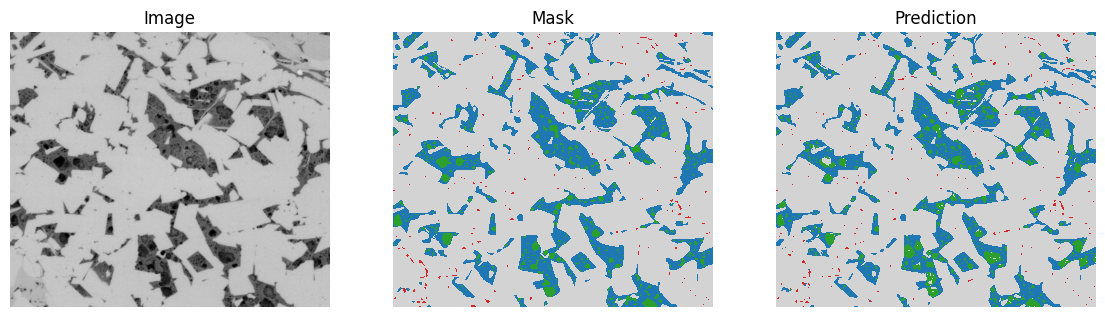

<Figure size 640x480 with 0 Axes>

In [9]:
import torch
import cv2
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

img = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1 - 003.jpeg"
mask = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1 - 003.png"
pred = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/single_predict/unet_Dice_cos_adamw_lr:8e-4_wd:1e-6_p:0.5.png"

# 定义自定义颜色列表
colors = ['#D3D3D3', '#1f77b4', '#2ca02c', '#d62728']
custom_cmap = ListedColormap(colors)

img = cv2.imread(img)
mask = cv2.imread(mask, 0)
pred = cv2.imread(pred, 0)

plt.figure(figsize=(14, 7))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap=custom_cmap, interpolation='nearest')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pred, cmap=custom_cmap, interpolation='nearest')
plt.title('Prediction')
plt.axis('off')

plt.show()
plt.tight_layout()


### 模型评估

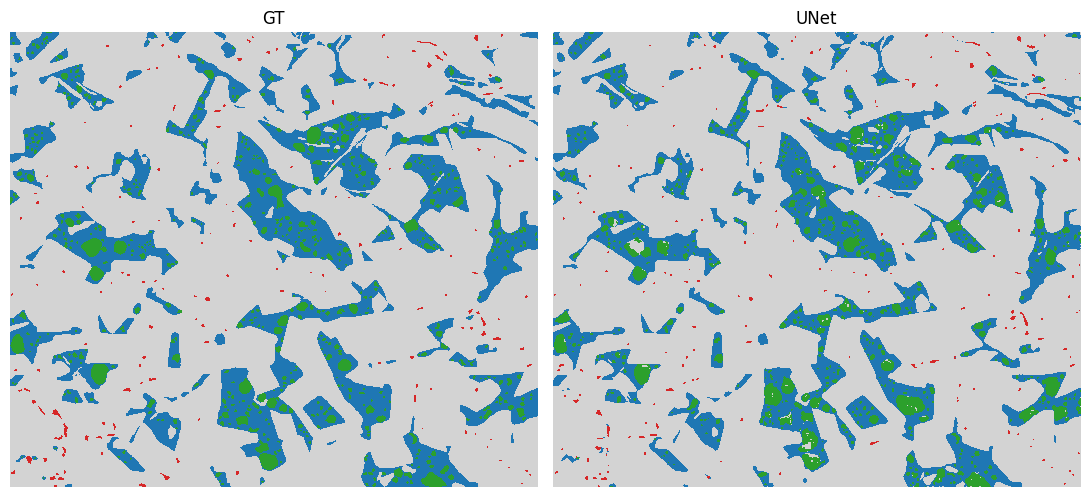

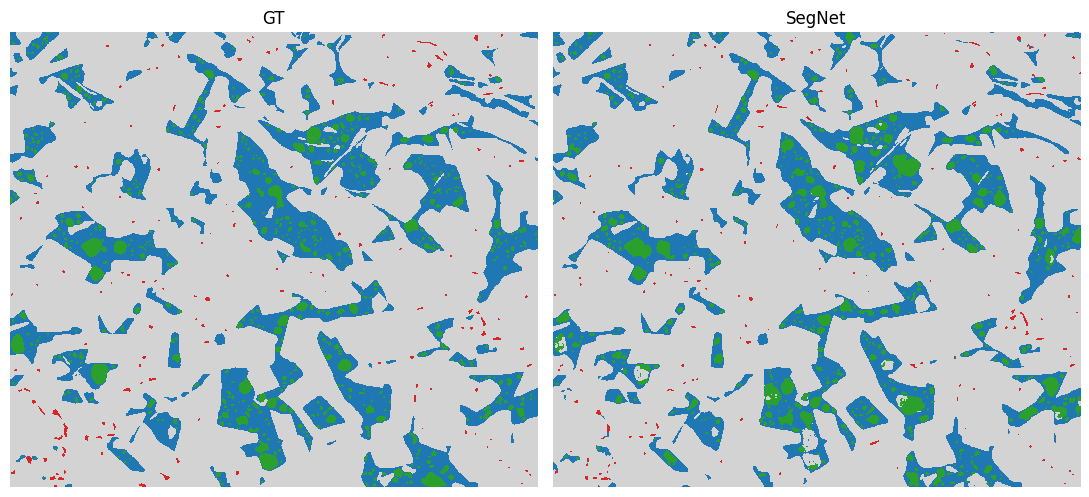

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
from matplotlib.colors import ListedColormap
import numpy as np

# 定义自定义颜色列表
colors = ['#D3D3D3', '#1f77b4', '#2ca02c', '#d62728']
custom_cmap = ListedColormap(colors)

path_dict = {
    "GT"            :   "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1 - 003.png",
    "UNet"          :   "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/single_predict/unet_Dice_cos_adamw_lr:8e-4_wd:1e-6_p:0.5.png",
    "SegNet"        :   "/mnt/c/VScode/WS-Hub/WS-U2net/single_predict/Segnet.png",
    # "DeepLabV3+"    :   "",

}

for i in range(len(path_dict) - 1):
    names, paths = list(path_dict.keys()), list(path_dict.values())
    gt = cv2.imread(path_dict["GT"])
    gt = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(11, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(gt, cmap=custom_cmap, interpolation='nearest')
    plt.title("GT")
    plt.axis("off")

    pred = cv2.imread(paths[i+1])
    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 2, 2)
    plt.imshow(pred, cmap=custom_cmap, interpolation='nearest')
    plt.title(names[i+1])
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
    

### 参数实验

#### 学习率

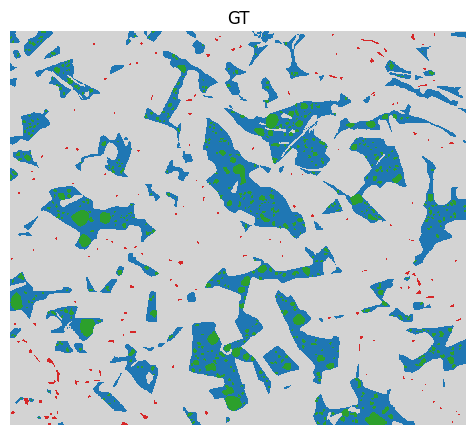

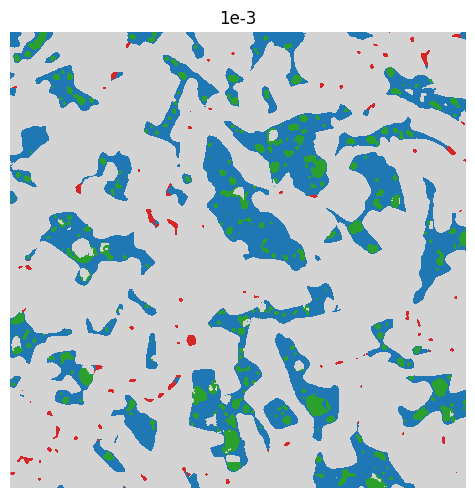

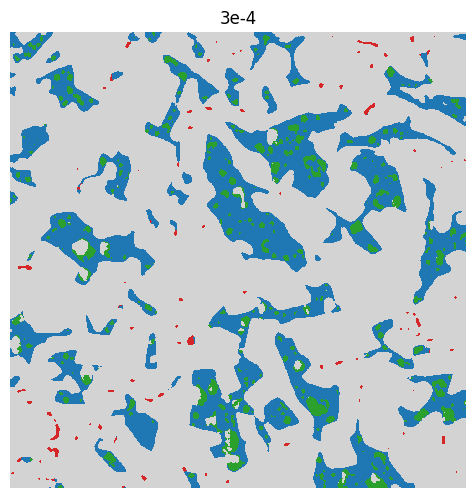

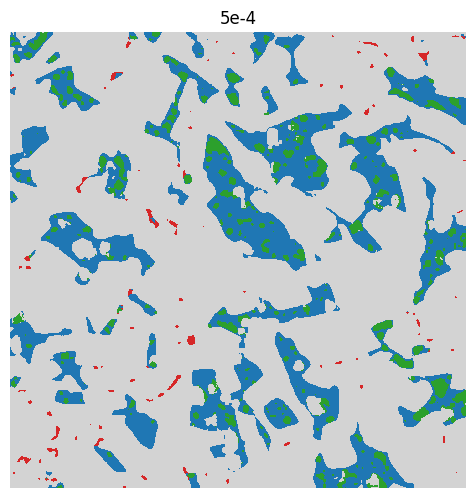

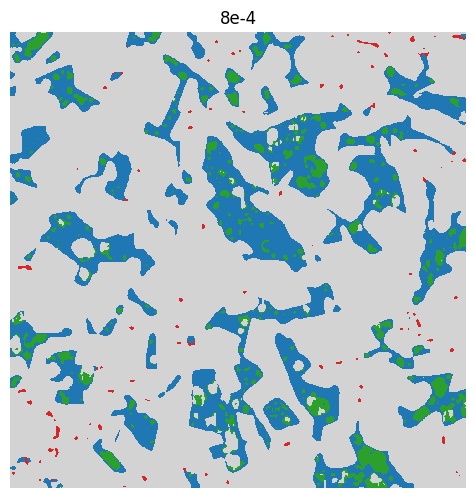

In [42]:
from matplotlib import pyplot as plt
from PIL import Image
from matplotlib.colors import ListedColormap
import numpy as np

# 定义自定义颜色列表
colors = ['#D3D3D3', '#1f77b4', '#2ca02c', '#d62728']
custom_cmap = ListedColormap(colors)

path_dict = {
    "GT"            :   "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1 - 003.png",
    "1e-3"          :   "/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:1e-3_wd:1e-4.png",
    "3e-4"          :   "/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:3e-4_wd:1e-4.png",
    "5e-4"          :   "/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:5e-4_wd:1e-4.png",
    "8e-4"          :   "/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-4.png"  

}

for i in range(len(path_dict)):
    names, paths = list(path_dict.keys()), list(path_dict.values())
    plt.figure(figsize=(20, 15)) 
    pred = cv2.imread(paths[i])
    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2GRAY)
    plt.subplot(2, 3, i+1)
    plt.title(names[i])
    plt.axis("off")
    plt.imshow(pred, cmap=custom_cmap, interpolation='nearest')

plt.show()
        
    

#### wd

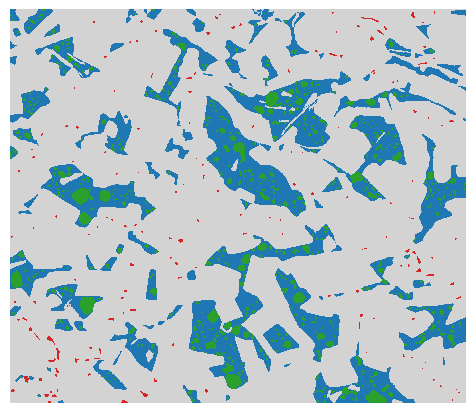

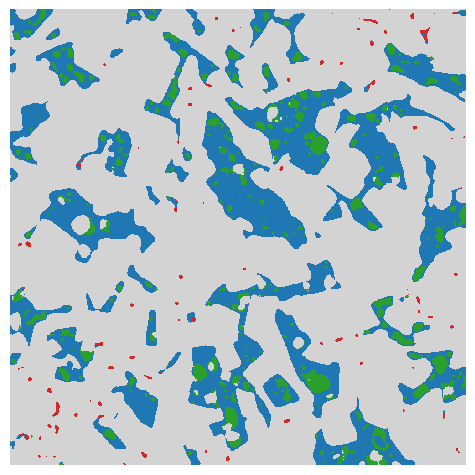

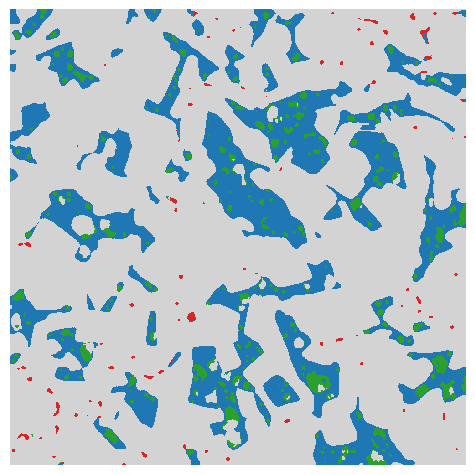

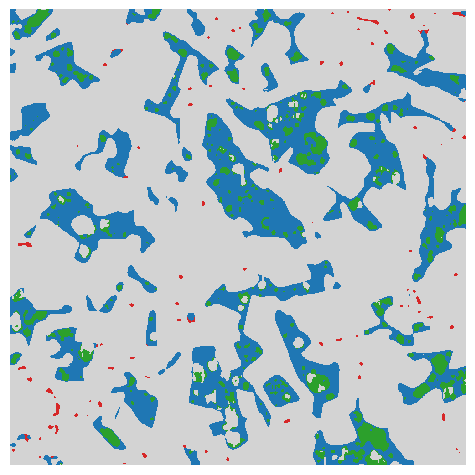

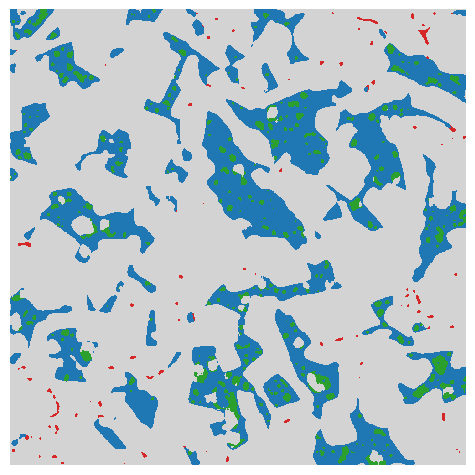

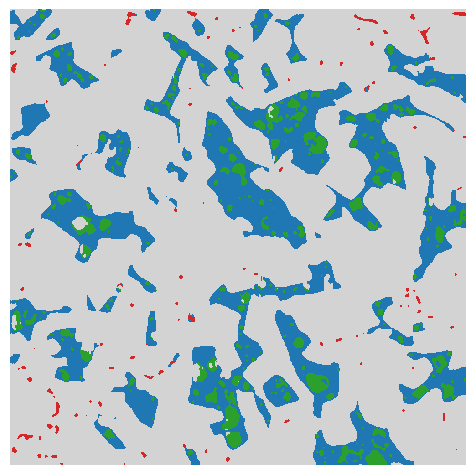

In [44]:
from matplotlib import pyplot as plt
from PIL import Image
from matplotlib.colors import ListedColormap
import numpy as np

# 定义自定义颜色列表
colors = ['#D3D3D3', '#1f77b4', '#2ca02c', '#d62728']
custom_cmap = ListedColormap(colors)

path_dict = {
    "GT"            :   "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1 - 003.png",
    "1e-2"          :   "/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-2.png",
    "1e-3"          :   "/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-3.png",
    "1e-4"          :   "/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-4.png",
    "1e-5"          :   "/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-5.png",
    "1e-6"          :   "/mnt/c/VScode/WS-Hub/WS-U2net/predict/DLunet_FC_cos_adamw_lr:8e-4_wd:1e-6.png",

}

for i in range(len(path_dict)):
    names, paths = list(path_dict.keys()), list(path_dict.values())
    plt.figure(figsize=(20, 15)) 
    pred = cv2.imread(paths[i])
    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2GRAY)
    plt.subplot(2, 3, i+1)
    # plt.title(names[i])
    plt.axis("off")
    plt.imshow(pred, cmap=custom_cmap, interpolation='nearest')

plt.show()
        
    